# Instagram Algorithm

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv("https://raw.githubusercontent.com/amankharwal/Website-data/master/instagram_reach.csv")
data.head()

,Unnamed: 0,S.No,USERNAME,Caption,Followers,Hashtags,Time since posted,Likes
0,0,1,mikequindazzi,Who are #DataScientist and what do they do? >>...,1600,#MachineLearning #AI #DataAnalytics #DataScien...,11 hours,139
1,1,2,drgorillapaints,We all know where it’s going. We just have to ...,880,#deck .#mac #macintosh#sayhello #apple #steve...,2 hours,23
2,2,3,aitrading_official,Alexander Barinov: 4 years as CFO in multinati...,255,#whoiswho #aitrading #ai #aitradingteam#instat...,2 hours,25
3,3,4,opensourcedworkplace,sfad,340,#iot #cre#workplace #CDO #bigdata #technology#...,3 hours,49
4,4,5,crea.vision,Ever missed a call while your phone was chargi...,304,#instamachinelearning #instabigdata#instamarke...,3 hours,30


In [3]:
data=data.drop(["Unnamed: 0","S.No","USERNAME"], axis=1)
data

,Caption,Followers,Hashtags,Time since posted,Likes
0,Who are #DataScientist and what do they do? >>...,1600,#MachineLearning #AI #DataAnalytics #DataScien...,11 hours,139
1,We all know where it’s going. We just have to ...,880,#deck .#mac #macintosh#sayhello #apple #steve...,2 hours,23
2,Alexander Barinov: 4 years as CFO in multinati...,255,#whoiswho #aitrading #ai #aitradingteam#instat...,2 hours,25
3,sfad,340,#iot #cre#workplace #CDO #bigdata #technology#...,3 hours,49
4,Ever missed a call while your phone was chargi...,304,#instamachinelearning #instabigdata#instamarke...,3 hours,30
...,...,...,...,...,...
95,"328 S. Wetherly Drive, Beverly Hills, CA 90212...",614,#beverlyhills #realestate#losangelesrealestate...,3 hours,31
96,Credit @tristankappel To find more dvlp follow...,450,#workspace #work #developer#development #devel...,3 hours,42
97,We are coming up with the Best 21 Books that w...,182,#books #book #motivation #inspiration #life#bo...,3 hours,10
98,We’re only paid to move dirt once. It’s not ju...,2039,#heavyequipment #underconstruction#dozer #real...,3 hours,222


In [4]:
data["Time since posted"]=data["Time since posted"].str.replace("hours","")
data

,Caption,Followers,Hashtags,Time since posted,Likes
0,Who are #DataScientist and what do they do? >>...,1600,#MachineLearning #AI #DataAnalytics #DataScien...,11,139
1,We all know where it’s going. We just have to ...,880,#deck .#mac #macintosh#sayhello #apple #steve...,2,23
2,Alexander Barinov: 4 years as CFO in multinati...,255,#whoiswho #aitrading #ai #aitradingteam#instat...,2,25
3,sfad,340,#iot #cre#workplace #CDO #bigdata #technology#...,3,49
4,Ever missed a call while your phone was chargi...,304,#instamachinelearning #instabigdata#instamarke...,3,30
...,...,...,...,...,...
95,"328 S. Wetherly Drive, Beverly Hills, CA 90212...",614,#beverlyhills #realestate#losangelesrealestate...,3,31
96,Credit @tristankappel To find more dvlp follow...,450,#workspace #work #developer#development #devel...,3,42
97,We are coming up with the Best 21 Books that w...,182,#books #book #motivation #inspiration #life#bo...,3,10
98,We’re only paid to move dirt once. It’s not ju...,2039,#heavyequipment #underconstruction#dozer #real...,3,222


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Caption            94 non-null     object
 1   Followers          100 non-null    int64 
 2   Hashtags           100 non-null    object
 3   Time since posted  100 non-null    object
 4   Likes              100 non-null    int64 
dtypes: int64(2), object(3)
memory usage: 4.0+ KB


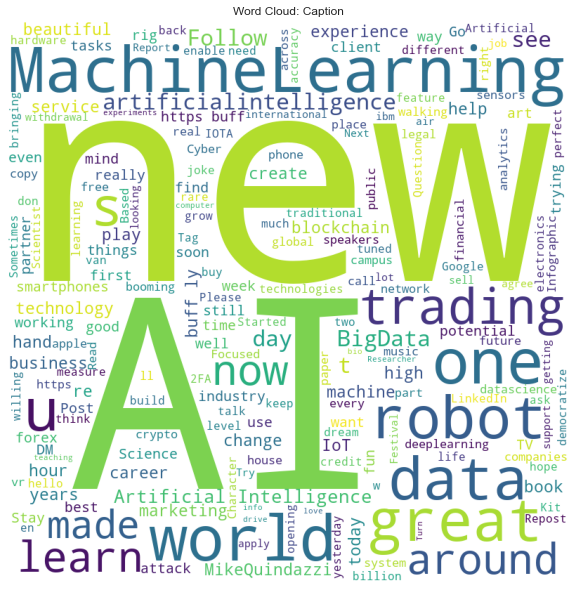

In [6]:
#understanding the maximum type of words used in Instagram captions and hashtags
from wordcloud import WordCloud, STOPWORDS 
stopwords = set(STOPWORDS) 
stopwords.add('will')

import re

sns.set()
plt.style.use('seaborn-whitegrid')

def WordCloudPlotter(dfColumn):
    colData = data[dfColumn]
    textCloud = ''
    
    #text processing
    # converting colums to a 
    #single line of text
    for mem in colData:
        textCloud = textCloud + str(mem)
    
    # plotting word cloud
    wordcloud = WordCloud(width = 800, height = 800,background_color ='white', 
                          stopwords = stopwords,  min_font_size = 10).generate(textCloud)
    plt.figure(figsize = (8, 8), facecolor = None)
    plt.style.use('seaborn-whitegrid')
    plt.imshow(wordcloud) 
    plt.rcParams.update({'font.size': 25})
    plt.axis("off") 
    plt.title('Word Cloud: ' + str(dfColumn))
    plt.tight_layout(pad = 0) 
  
    plt.show()
    
WordCloudPlotter('Caption')

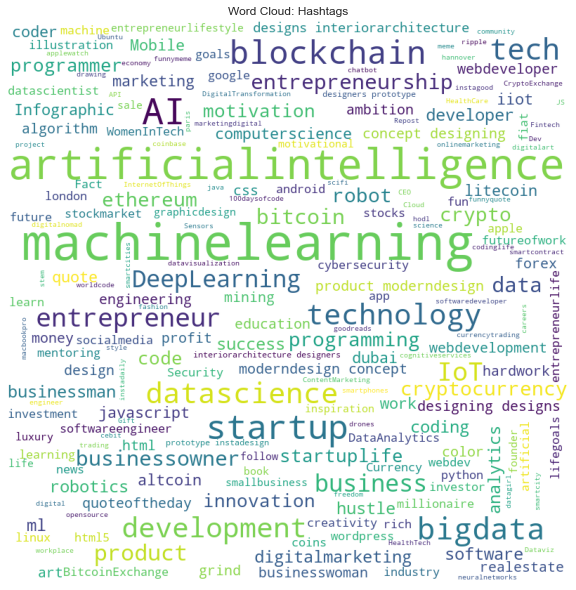

In [7]:
WordCloudPlotter('Hashtags')

In [8]:
data["Time since posted"]=data["Time since posted"].astype("int")

<AxesSubplot:xlabel='Time since posted', ylabel='Likes'>

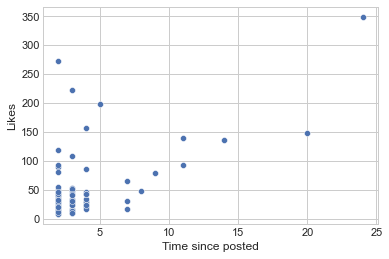

In [24]:
sns.scatterplot(data=data , x="Time since posted",y="Likes")

<AxesSubplot:xlabel='Followers', ylabel='Likes'>

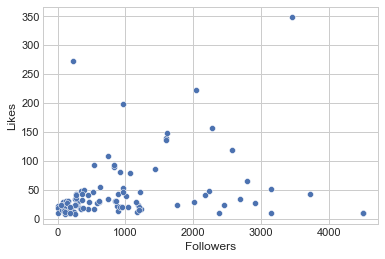

In [25]:
sns.scatterplot(data=data , x="Followers",y="Likes")

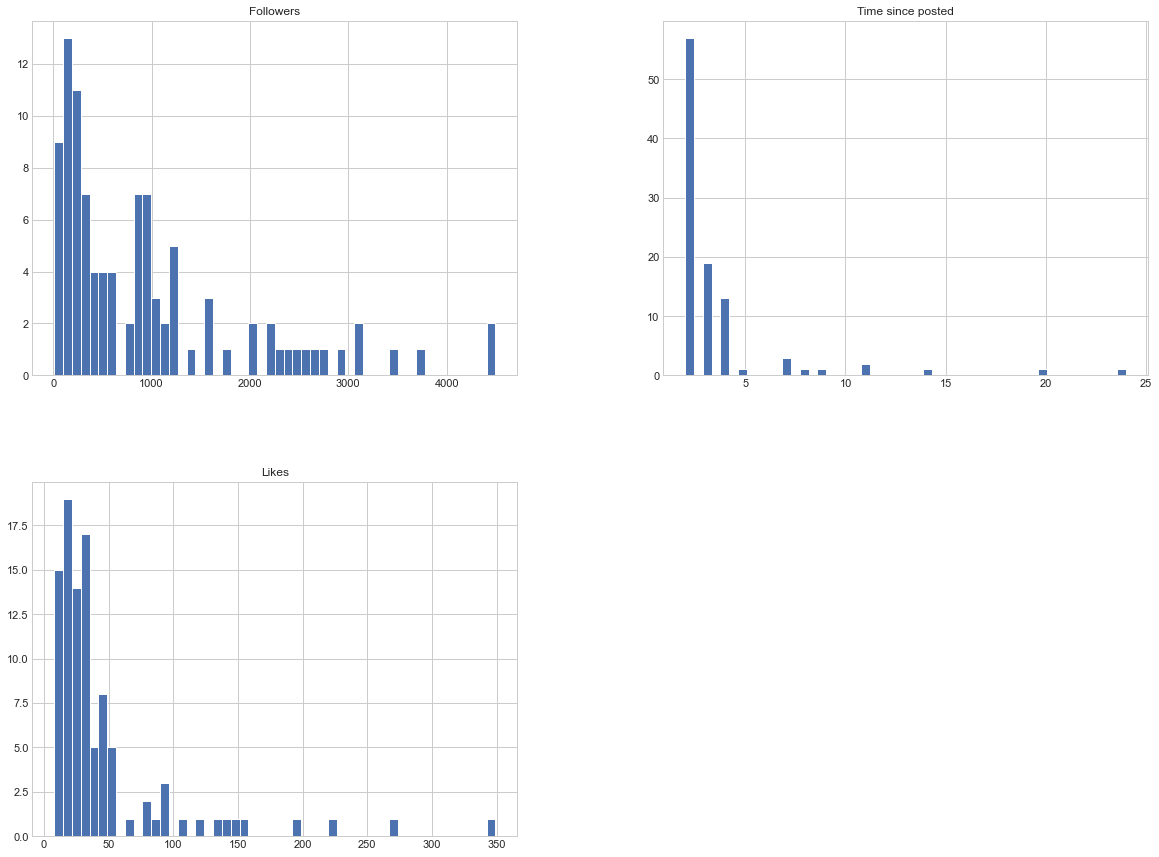

In [26]:
data.hist(bins=50 , figsize=(20,15));

In [9]:
inputs=data[["Followers","Time since posted"]]
target=data["Likes"]

In [10]:
from sklearn.model_selection import train_test_split

x_train ,x_test , y_train , y_test=train_test_split(inputs , target , test_size=0.2 , random_state=42)

In [11]:
from sklearn.linear_model import LinearRegression

reg=LinearRegression()
reg.fit(x_train , y_train)
reg_pred=reg.predict(x_test)

In [12]:
from sklearn.metrics import r2_score

r2_score(y_test , reg_pred )

0.6183678779549548

In [13]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_test , reg_pred)

541.0121910944124

In [14]:
from sklearn.preprocessing import StandardScaler 
scaler=StandardScaler()
scaler.fit(x_train)
x_train_scaled=scaler.transform(x_train)
x_test_scaled=scaler.transform(x_test)

In [15]:
reg_scaled=LinearRegression()
reg_scaled.fit(x_train_scaled , y_train)
reg_scaled_pred=reg_scaled.predict(x_test_scaled)

In [16]:
r2_score(y_test , reg_scaled_pred )

0.6183678779549548

In [17]:
mean_squared_error(y_test , reg_scaled_pred)

541.0121910944123

In [18]:
from sklearn.preprocessing import PolynomialFeatures

poly=PolynomialFeatures(degree=2)
poly.fit(inputs)
poly_features=poly.transform(inputs)

In [19]:
reg_poly=LinearRegression()
reg_poly.fit(x_train , y_train)
reg_poly_pred=reg_poly.predict(x_test)

In [20]:
r2_score(y_test , reg_poly_pred )

0.6183678779549548

In [21]:
mean_squared_error(y_test , reg_poly_pred)

541.0121910944124

In [22]:
df=data.drop(["Caption" ,"Hashtags"], axis=1)


<AxesSubplot:>

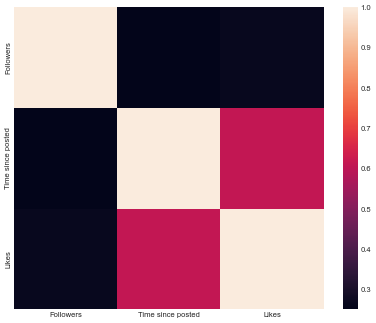

In [23]:
plt.figure(figsize=(10,8) , dpi=50)
sns.heatmap(df.corr())

In [34]:
import numpy as np
features = np.array(data[['Followers', 'Time since posted']], dtype = 'float32')
targets = np.array(data['Likes'], dtype = 'float32')
maxValLikes = max(targets)
print('Max value of target is {}'.format(maxValLikes))

Max value of target is 349.0


In [28]:
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor()
gbr.fit(x_train_scaled, y_train)
gbr_pred = gbr.predict(x_test)

C:\Anaconda\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but GradientBoostingRegressor was fitted without feature names
  warnings.warn(


In [29]:
r2_score(y_test , gbr_pred )

-13.428858904732373

In [30]:
mean_squared_error(y_test , gbr_pred)

20454.747176968493

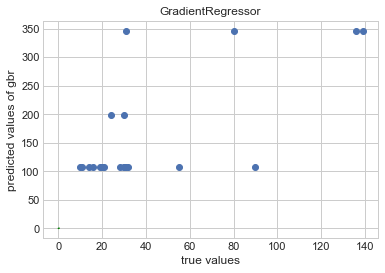

In [31]:
plt.scatter(y_test, gbr_pred)
plt.style.use('seaborn-whitegrid')
plt.xlabel('true values')
plt.ylabel('predicted values of gbr')
plt.title('GradientRegressor')
plt.plot(np.arange(0,0.4, 0.01), np.arange(0, 0.4, 0.01), color = 'green')
plt.grid(True)

C:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


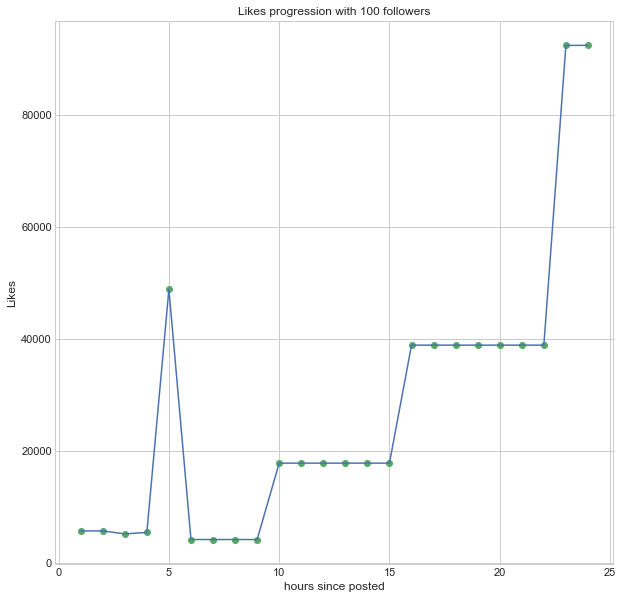

In [35]:
# implement it by framing the realtime cases

def PredictionsWithConstantFollowers(model, followerCount, scaller,maxValLikes):
    followers = followerCount * np.ones(24)
    hours = np.arange(1, 25)
    
    # defining vector 
    featureVector = np.zeros((24, 2))
    featureVector[:, 0] = followers
    featureVector [:, 1] = hours
    
    # doing scalling
    featureVector = scaller.transform(featureVector)
    predictions = model.predict(featureVector)
    predictions = (maxValLikes * predictions).astype('int')
    
    plt.figure(figsize= (10, 10))
    plt.plot(hours, predictions)
    plt.style.use('seaborn-whitegrid')
    plt.scatter(hours, predictions, color = 'g')
    plt.grid(True)
    plt.xlabel('hours since posted')
    plt.ylabel('Likes')
    plt.title('Likes progression with ' + str(followerCount) +' followers')
    plt.show()
        
PredictionsWithConstantFollowers(gbr, 100, scaler, maxValLikes)

C:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


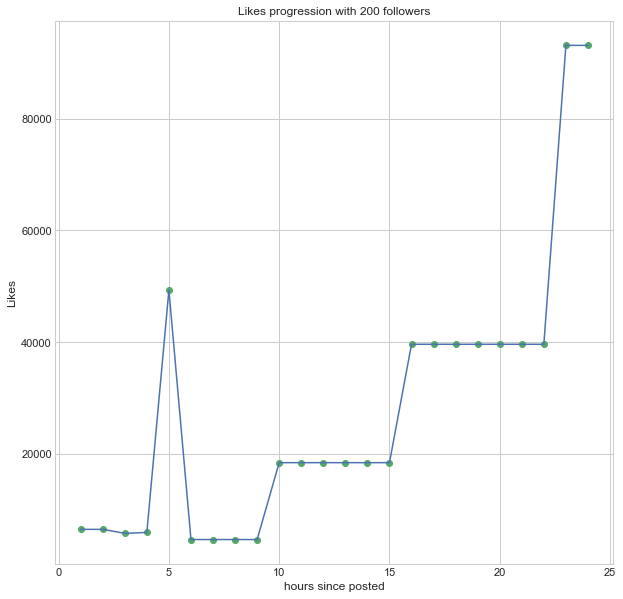

In [37]:
# likes progression for 200 followers
PredictionsWithConstantFollowers(gbr, 200, scaler, maxValLikes)